**APMA4990 Intro Data Sci**
<br>Homework 1 &emsp; Due: 2/8/2018
<br>Name: Junru Li &emsp; UNI:jl4939 &emsp; Program: M.S.

## Part I: Classification

**1) Load in the dataset https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv into a pandas dataframe.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Load Data
df = pd.read_csv("https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv",index_col = 0)
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


**2) Convert default and student to categorical variables.**

In [2]:
# Set 'No' to '0'; 'Yes' to '1'
df = df.replace("No",0).replace("Yes",1)
df.head()

,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879


**3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color of the outcome of default labeled red if yes and blue if no.**

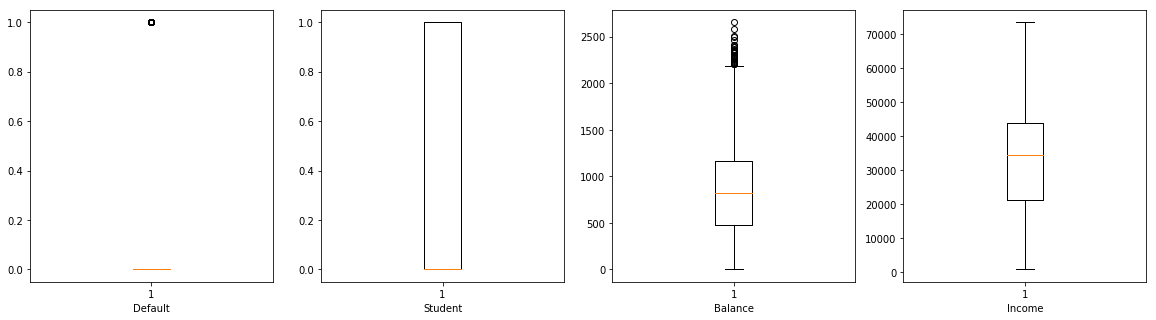

In [3]:
# Boxplot of All
fig = plt.figure(figsize = (20,5))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

ax1.boxplot(df["default"])
ax2.boxplot(df["student"])
ax3.boxplot(df["balance"])
ax4.boxplot(df["income"])
ax1.set_xlabel("Default")
ax2.set_xlabel("Student")
ax3.set_xlabel("Balance")
ax4.set_xlabel("Income")
plt.show()

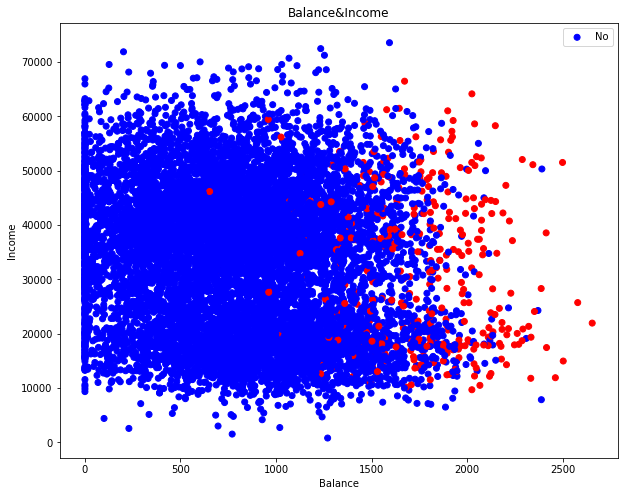

In [4]:
# Scatter Plot of 'Balance' & 'Income'
colors= {0:"blue",1:"red"}
plt.figure(figsize=(10,8))
plt.scatter(df["balance"],df["income"],c = df["default"].apply(lambda x:colors[x]))
plt.title("Balance&Income")
plt.xlabel("Balance")
plt.ylabel("Income")
plt.legend(['No'])
plt.show()


**4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley on the balance and income variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.**

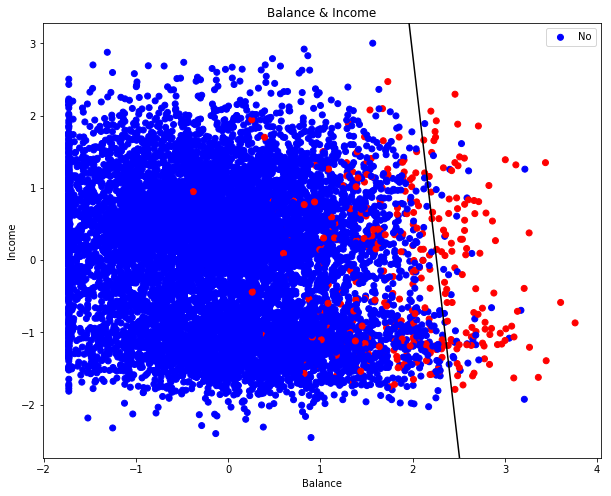

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split Data
X = df[["balance","income"]]
y = df["default"]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 50)

# Training model
regr = LogisticRegression(penalty = "l1")
model1 = regr.fit(X_train,y_train)

# Scatter Plot
colors= {0:"blue",1:"red"}
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(X[:,0],X[:,1],c = df["default"].apply(lambda x:colors[x]))
plt.title("Balance & Income")
plt.xlabel("Balance")
plt.ylabel("Income")
plt.legend(['No'])

# Decision Boundary 
b = model1.intercept_
coef = model1.coef_[0]

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

x = np.arange(x_min, x_max, 1)
y = (b + coef[0] * x) / -coef[1]

plt.plot(x, y, c='black')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

Area under the ROC curve : 0.957250


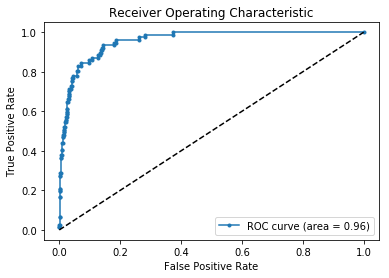

In [6]:
from sklearn.metrics import auc, roc_curve
from sklearn.datasets import make_classification

def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Generate ROC  for LR with l1 penalty and C=0.1
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

**5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking of coefficients. How does performance improve with the added variable?
**

Area under the ROC curve : 0.957912


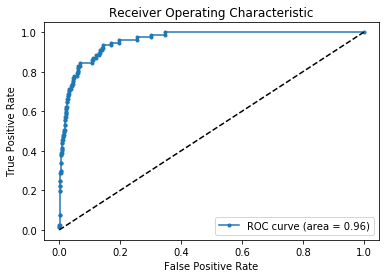

The performance after add one variable is not significantly better than before.
The coefficients for balance, income and student are shown respectively: [ 0.06172524  0.00212686 -0.00427   ].


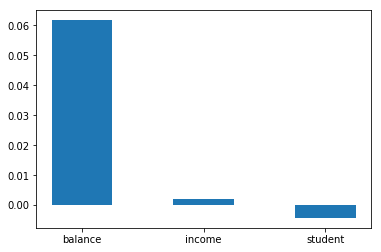

In [7]:
from sklearn.linear_model import Ridge

# Add Variable 'Student'
X = df[['balance','income','student']]
y = df['default']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 50)

fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
generate_ROCplot(fpr,tpr,'LR',roc_auc)

alphas = np.logspace(-6, -1, 100)
score = []
for alpha in alphas:
    clf = Ridge(alpha=alpha)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))
opt_index = np.array(score).argmax()

clf = Ridge(alpha=alphas[opt_index])
clf.fit(X_train, y_train)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar(np.arange(3), clf.coef_, 0.5)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(('balance', 'income', 'student'))
rects = ax.patches
print("The performance after add one variable is not significantly better than before.")
print ('The coefficients for balance, income and student are shown respectively: {0}.'.format(clf.coef_))
plt.show()

**6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).**

In [8]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regr, X_train, y_train, cv=5)
print(scores)
print("According to the cross valdiation score, the model is robust.")

[0.97626483 0.97125    0.976875   0.973125   0.9724828 ]
According to the cross valdiation score, the model is robust.


**7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?
**

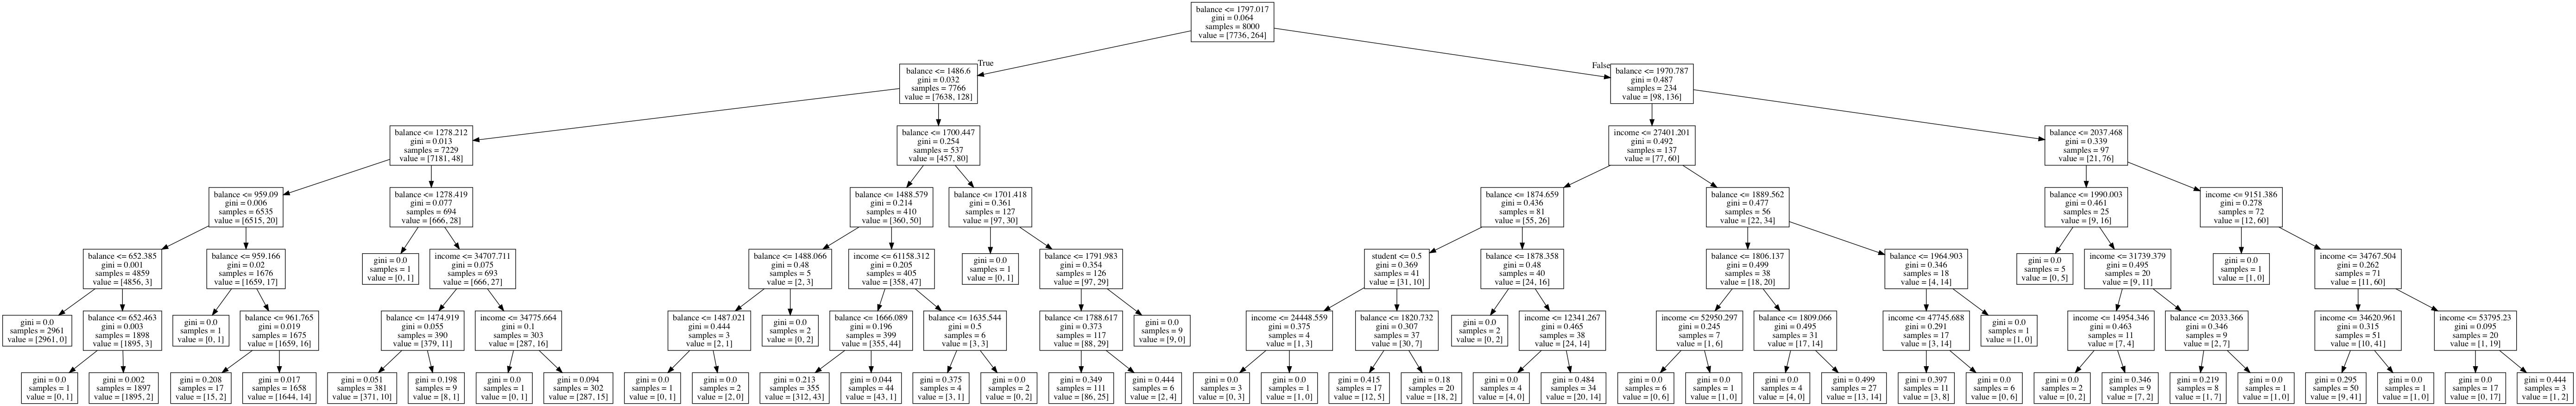

In [17]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus
X = df.drop(["default"],1)
y = df.default
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

dt=DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)

dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data, feature_names=X_train.columns)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**8) Find the optimal decision tree depth and compute the AUC ROC.**

Optimal Depth: 5.


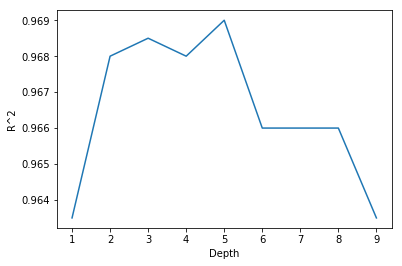

In [20]:
train_errors=[]
test_errors=[]
scores=[]
depths = range(1,10)
for n in depths:
    dt = DecisionTreeClassifier(max_depth=n)
    # Train the model using the training sets
    dt.fit(X_train, y_train)
    train_errors.append(dt.score(X_train,y_train))
    scores.append(dt.score(X_test,y_test))
plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,scores)
test_errors = scores
n_opt = depths[np.argmax(scores)]
print("Optimal Depth: {0}.".format(n_opt))
plt.show()


Area under the ROC curve : 0.932550


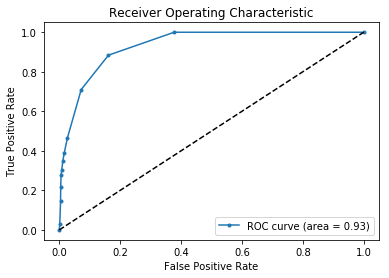

Max Depth = 4
Area under the ROC curve : 0.921757


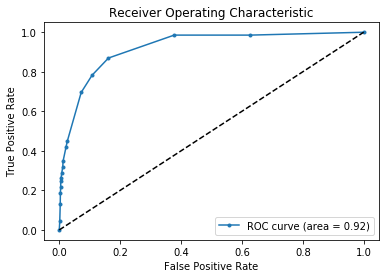

Max Depth = 5
Area under the ROC curve : 0.904683


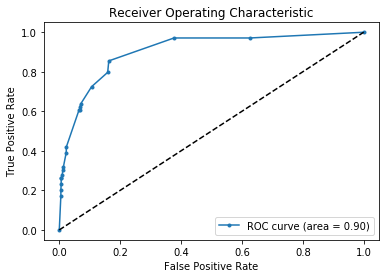

Max Depth = 6
According to ROC figures, the depth of 4 seems a little bit better than the depth of 5.


In [24]:
# Different Max Depth = 4
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth = 4)
generate_ROCplot(fpr,tpr,'LR',roc_auc)
print('Max Depth = 4')

# Different Max Depth = 5
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth = 5)
generate_ROCplot(fpr,tpr,'LR',roc_auc)
print('Max Depth = 5')

# Different Max Depth = 6
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth = 6)
generate_ROCplot(fpr,tpr,'LR',roc_auc)
print('Max Depth = 6')

print('According to ROC figures, the depth of 4 seems a little bit better than the depth of 5.')